# All Architectures

### Problem 2:
$$\begin{cases}
-\Delta u = \frac{17}{4}\pi^2\text{sin}(\frac{\pi}{2} x_1)\text{cos}(2\pi x_2) &\text{on } \Omega\\
u = \text{sin}(\frac{\pi}{2} x_1)\text{cos}(2\pi x_2) &\text{on } \partial\Omega
\end{cases}$$

With weak form
$$
\mathcal{J}(v) = \int_\Omega \frac{1}{2}|\nabla v|^2-\frac{17}{4}\pi^2\sin(\frac{\pi}{2}x_1)\cos(2\pi x_2) \text{d}\boldsymbol{x}
$$

Where $\Omega = (-1,1)\times(-1,1)$

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim, autograd
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cbook as cbook
import matplotlib.patches as patches

## Shallow NN

In [4]:
class srnn(nn.Module):
    """
    srnn -- Shallow Ritz Neural Network

    Implements a network with single hidden layer

    Parameters:
        in_N  -- input dimension
        out_N -- output dimension
        m     -- width of layers that form blocks
        depth -- number of blocks to be stacked
        phi   -- the activation function
    """

    def __init__(self, in_N, m, out_N, depth=0):
        super(srnn, self).__init__()
        
        # set parameters
        self.in_N = in_N
        self.m = m
        self.out_N = out_N
        self.depth = depth
        
        self.input = nn.Linear(in_N, m)
        self.hidden = nn.Linear(m, m)
        self.output = nn.Linear(m, out_N)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.input(x))
        x = self.relu(self.hidden(x))
        x = self.output(x)
        return x

## Feedforward NN, tanh Activation

In [5]:
class drfnn2(nn.Module):
    """
    drfnn2 -- Deep Ritz Feedforward Neural Network

    Implements a network with single hidden layer

    Parameters:
        in_N  -- input dimension
        out_N -- output dimension
        m     -- width of layers that form blocks
        depth -- number of blocks to be stacked
        phi   -- the activation function
    """

    def __init__(self, in_N, m, out_N, depth=8):
        super(drfnn2, self).__init__()
        
        # set parameters
        self.in_N = in_N
        self.m = m
        self.out_N = out_N
        self.depth = depth
        
        # list for holding all the layers
        self.stack = nn.ModuleList()

        # add first layer to list
        self.stack.append(nn.Linear(in_N, m))

        # add middle layers to list
        for i in range(depth):
            self.stack.append(nn.Linear(m, m))

        self.output = nn.Linear(m, out_N)
        self.phi = nn.Tanh()

    def forward(self, x):        
        for i in range(len(self.stack)):
            x = self.phi(self.stack[i](x))
        x = self.output(x)
        return x

## Feedforward NN

In [6]:
class drfnn(nn.Module):
    """
    drnn -- Deep Ritz Feedforward Neural Network

    Implements a network with single hidden layer

    Parameters:
        in_N  -- input dimension
        out_N -- output dimension
        m     -- width of layers that form blocks
        depth -- number of blocks to be stacked
        phi   -- the activation function
    """

    def __init__(self, in_N, m, out_N, depth=8):
        super(drfnn, self).__init__()
        
        # set parameters
        self.in_N = in_N
        self.m = m
        self.out_N = out_N
        self.depth = depth
        
        # list for holding all the layers
        self.stack = nn.ModuleList()

        # add first layer to list
        self.stack.append(nn.Linear(in_N, m))

        # add middle layers to list
        for i in range(depth):
            self.stack.append(nn.Linear(m, m))

        self.output = nn.Linear(m, out_N)
        self.relu = nn.ReLU()

    def forward(self, x):        
        for i in range(len(self.stack)):
            x = self.relu(self.stack[i](x))
        x = self.output(x)
        return x

## Residual NN, ReLU Activation

In [7]:
class drrnn2(nn.Module):
    """
    drrnn2 -- Deep Ritz Residual Neural Network 2: Single Layer Blocks

    Implements a residual network with a skip connection every layer
    (rather than every two layers)

    Parameters:
        in_N  -- input dimension
        out_N -- output dimension
        m     -- width of layers that form blocks
        depth -- number of blocks to be stacked
        phi   -- the activation function
    """

    def __init__(self, in_N, m, out_N, depth=8):
        super(drrnn2, self).__init__()
        
        # set parameters
        self.in_N = in_N
        self.m = m
        self.out_N = out_N
        self.depth = depth
        
        self.input = nn.Linear(in_N, m)
        
        # list for holding all the layers
        self.stack = nn.ModuleList()

        # add first layer to list
        #self.stack.append(nn.Linear(in_N, m))

        # add middle layers to list
        for i in range(depth):
            self.stack.append(nn.Linear(m, m))

        self.output = nn.Linear(m, out_N)
        self.relu = nn.ReLU()

    def forward(self, x):        
        x = self.input(x)
        for i in range(len(self.stack)):
            x = self.relu(self.stack[i](x)) + x
        x = self.output(x)
        return x

## Residual NN, Tanh Activation

In [8]:
class drrnn2t(nn.Module):
    """
    drrnn2t -- Deep Ritz Residual Neural Network 2: Single Layer Blocks, tanh activation

    Implements a residual network with a skip connection every layer
    (rather than every two layers)

    Parameters:
        in_N  -- input dimension
        out_N -- output dimension
        m     -- width of layers that form blocks
        depth -- number of blocks to be stacked
        phi   -- the activation function
    """

    def __init__(self, in_N, m, out_N, depth=8):
        super(drrnn2t, self).__init__()
        
        # set parameters
        self.in_N = in_N
        self.m = m
        self.out_N = out_N
        self.depth = depth
        
        self.input = nn.Linear(in_N, m)
        
        # list for holding all the layers
        self.stack = nn.ModuleList()

        # add middle layers to list
        for i in range(depth):
            self.stack.append(nn.Linear(m, m))

        self.output = nn.Linear(m, out_N)
        self.tanh = nn.Tanh()

    def forward(self, x):        
        x = self.input(x)
        for i in range(len(self.stack)):
            x = self.tanh(self.stack[i](x)) + x
        x = self.output(x)
        return x

## Original Residual NN, ReLU Activation

In [9]:
class BlockReLU(nn.Module):
    """
    IMplementation of the block used in the Deep Ritz
    Paper

    Parameters:
    in_N  -- dimension of the input
    width -- number of nodes in the interior middle layer
    out_N -- dimension of the output
    phi   -- activation function used
    """

    def __init__(self, in_N, width, out_N):
        super(BlockReLU, self).__init__()
        # create the necessary linear layers
        self.L1 = nn.Linear(in_N, width)
        self.L2 = nn.Linear(width, out_N)
        # choose appropriate activation function
        #self.phi = nn.Tanh()
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.relu(self.L2(self.relu(self.L1(x)))) + x

In [10]:
class drrnn3(nn.Module):
    """
    drrnn3 -- Deep Ritz Residual Neural Network

    Implements a network with the architecture used in the
    deep ritz method paper

    Parameters:
        in_N  -- input dimension
        out_N -- output dimension
        m     -- width of layers that form blocks
        depth -- number of blocks to be stacked
        phi   -- the activation function
    """

    def __init__(self, in_N, m, out_N, depth=4):
        super(drrnn3, self).__init__()
        # set parameters
        self.in_N = in_N
        self.m = m
        self.out_N = out_N
        self.depth = depth
        #self.phi = nn.Tanh()
        self.relu = nn.ReLU()
        # list for holding all the blocks
        self.stack = nn.ModuleList()

        # add first layer to list
        self.stack.append(nn.Linear(in_N, m))

        # add middle blocks to list
        for i in range(depth):
            self.stack.append(BlockReLU(m, m, m))

        # add output linear layer
        self.stack.append(nn.Linear(m, out_N))

    def forward(self, x):
        # first layer
        for i in range(len(self.stack)):
            x = self.stack[i](x)
        return x

## Original Residual NN, Power ReLU Activation

In [11]:
class PowerReLU(nn.Module):
    """
    Implements simga(x)^(power)
    Applies a power of the rectified linear unit element-wise.

    NOTE: inplace may not be working.
    Can set inplace for inplace operation if desired.
    BUT I don't think it is working now.

    INPUT:
        x -- size (N,*) tensor where * is any number of additional
             dimensions
    OUTPUT:
        y -- size (N,*)
    """

    def __init__(self, inplace=False, power=3):
        super(PowerReLU, self).__init__()
        self.inplace = inplace
        self.power = power

    def forward(self, input):
        y = F.relu(input, inplace=self.inplace)
        return torch.pow(y, self.power)

In [12]:
class BlockPower(nn.Module):
    """
    IMplementation of the block used in the Deep Ritz
    Paper

    Parameters:
    in_N  -- dimension of the input
    width -- number of nodes in the interior middle layer
    out_N -- dimension of the output
    phi   -- activation function used
    """

    def __init__(self, in_N, width, out_N, phi=PowerReLU()):
        super(BlockPower, self).__init__()
        # create the necessary linear layers
        self.L1 = nn.Linear(in_N, width)
        self.L2 = nn.Linear(width, out_N)
        # choose appropriate activation function
        self.phi = phi

    def forward(self, x):
        return self.phi(self.L2(self.phi(self.L1(x)))) + x

In [13]:
class drrnn4(nn.Module):
    """
    drrnn4 -- Deep Ritz Residual Neural Network

    Implements a network with the architecture used in the
    deep ritz method paper

    Parameters:
        in_N  -- input dimension
        out_N -- output dimension
        m     -- width of layers that form blocks
        depth -- number of blocks to be stacked
        phi   -- the activation function
    """

    def __init__(self, in_N, m, out_N, depth=4, phi=PowerReLU()):
        super(drrnn4, self).__init__()
        # set parameters
        self.in_N = in_N
        self.m = m
        self.out_N = out_N
        self.depth = depth
        #self.phi = nn.Tanh()
        # list for holding all the blocks
        self.stack = nn.ModuleList()

        # add first layer to list
        self.stack.append(nn.Linear(in_N, m))

        # add middle blocks to list
        for i in range(depth):
            self.stack.append(BlockPower(m, m, m))

        # add output linear layer
        self.stack.append(nn.Linear(m, out_N))

    def forward(self, x):
        # first layer
        for i in range(len(self.stack)):
            x = self.stack[i](x)
        return x

## Original Residual NN, Tanh Activation

In [14]:
class Block(nn.Module):
    """
    IMplementation of the block used in the Deep Ritz
    Paper

    Parameters:
    in_N  -- dimension of the input
    width -- number of nodes in the interior middle layer
    out_N -- dimension of the output
    phi   -- activation function used
    """

    def __init__(self, in_N, width, out_N, phi=PowerReLU()):
        super(Block, self).__init__()
        # create the necessary linear layers
        self.L1 = nn.Linear(in_N, width)
        self.L2 = nn.Linear(width, out_N)
        # choose appropriate activation function
        self.phi = nn.Tanh()

    def forward(self, x):
        return self.phi(self.L2(self.phi(self.L1(x)))) + x

In [15]:
class drrnn(nn.Module):
    """
    drrnn -- Deep Ritz Residual Neural Network

    Implements a network with the architecture used in the
    deep ritz method paper

    Parameters:
        in_N  -- input dimension
        out_N -- output dimension
        m     -- width of layers that form blocks
        depth -- number of blocks to be stacked
        phi   -- the activation function
    """

    def __init__(self, in_N, m, out_N, depth=4, phi=PowerReLU()):
        super(drrnn, self).__init__()
        # set parameters
        self.in_N = in_N
        self.m = m
        self.out_N = out_N
        self.depth = depth
        self.phi = nn.Tanh()
        # list for holding all the blocks
        self.stack = nn.ModuleList()

        # add first layer to list
        self.stack.append(nn.Linear(in_N, m))

        # add middle blocks to list
        for i in range(depth):
            self.stack.append(Block(m, m, m))

        # add output linear layer
        self.stack.append(nn.Linear(m, out_N))

    def forward(self, x):
        # first layer
        for i in range(len(self.stack)):
            x = self.stack[i](x)
        return x

--------------------------------------------------------------------------------------------------------------------------------

# Sampling in $\mathbb{R}^2$

In [16]:
# SQUARE CENTRED AT ORIGIN, SIDE LENGTH 2
def get_interior_points_sq(N=128,d=2):
    """
    randomly sample N points from interior of [-1,1]^2
    """
    return torch.rand(N,d) * 2 - 1

def get_boundary_points_sq(N=32):
    """
    randomly sample N points from boundary of [-1,1]^2
    """
    index1 = torch.rand(N,1) * 2 - 1
    xb2 = torch.cat((index1, torch.ones_like(index1)), dim=1)
    xb3 = torch.cat((index1, torch.full_like(index1, -1)), dim=1)
    xb4 = torch.cat((torch.ones_like(index1), index1), dim=1)
    xb5 = torch.cat((torch.full_like(index1, -1), index1), dim=1)
    xb = torch.cat((xb2, xb3, xb4, xb5), dim=0)

    return xb

In [17]:
# CIRCLE CENTRED AT ORIGIN
def get_interior_points_circle(N=128):
    """
    randomly sample N points from interior of {x^2 + y^2 < 1}
    """
    r = torch.rand(N)
    theta = torch.rand(N)*2*torch.pi
    x = r*torch.cos(theta)
    y = r*torch.sin(theta)
    return torch.cat((x.reshape((-1,1)),y.reshape((-1,1))), dim=1)

def get_boundary_points_circle(N=128):    
    """
    randomly sample N points from boundary of {x^2 + y^2 < 1}
    """
    theta = torch.rand(N)*2*torch.pi
    x = torch.cos(theta)
    y = torch.sin(theta)
    return torch.cat((x.reshape((-1,1)),y.reshape((-1,1))), dim=1)

In [18]:
# SQUARE IN POSITIVE QUADRANT, SIDE LENGTH 1
def get_interior_points_sq_pos(N=128,d=2):
    """
    randomly sample N points from interior of [0,1]^2
    """
    return torch.rand(N,d)

def get_boundary_points_sq_pos(N=32):
    """
    randomly sample N points from boundary of [0,1]^2
    """
    index1 = torch.rand(N,1)
    xb1 = torch.cat((torch.ones_like(index1), index1), dim=1)         # Right
    xb2 = torch.cat((index1, torch.ones_like(index1)), dim=1)         # Top
    xb3 = torch.cat((torch.zeros_like(index1), index1), dim=1)        # Left
    xb4 = torch.cat((index1, torch.zeros_like(index1)), dim=1)        # Bottom
    xb = torch.cat((xb1, xb2, xb3, xb4), dim=0)
    return xb

In [19]:
# ORIGINAL DOMAIN: \Omega = (-1,1)^2 \ [0,1)x{0}
def get_interior_points_original(N=128,d=2):
    """
    randomly sample N points from interior of (-1,1)^2 \ [0,1)x{0}
    """
    return torch.rand(N,d) * 2 - 1

def get_boundary_points_original(N=32):
    """
    randomly sample N points from boundary of (-1,1)^2 \ [0,1)x{0}
    """
    index = torch.rand(N,1)
    index1 = torch.rand(N,1) * 2 - 1
    xb1 = torch.cat((index, torch.zeros_like(index)), dim=1)
    xb2 = torch.cat((index1, torch.ones_like(index1)), dim=1)
    xb3 = torch.cat((index1, torch.full_like(index1, -1)), dim=1)
    xb4 = torch.cat((torch.ones_like(index1), index1), dim=1)
    xb5 = torch.cat((torch.full_like(index1, -1), index1), dim=1)
    xb = torch.cat((xb1, xb2, xb3, xb4, xb5), dim=0)

    return xb

In [20]:
# BACKWARDS L-SHAPE DOMAIN: \Omega = (-1,1)^2 \ [-1,0]x[0,1]
def get_interior_points_l_shape(N=129,d=2):
    """
    randomly sample N points from interior of (-1,1)^2 \ [-1,0]x[0,1]
    """
    sq1 = torch.rand(N//3,d)                          # Top Right
    sq2 = torch.rand(N//3,d) - torch.tensor((0,1))    # Bottom Right
    sq3 = torch.rand(N//3,d) - torch.tensor((1,1))    # Bottom Left
    return torch.cat((sq1, sq2, sq3), dim=0)

def get_boundary_points_l_shape(N=32):
    """
    randomly sample N points from boundary of (-1,1)^2 \ [-1,0]x[0,1]
    """
    index = torch.rand(N//2,1)              # Short Edges
    index1 = torch.rand(N,1) * 2 - 1     # Long Edges
    
    xb1 = torch.cat((torch.ones_like(index1), index1), dim=1)
    xb2 = torch.cat((index, torch.ones_like(index)), dim=1)
    xb3 = torch.cat((torch.zeros_like(index), index), dim=1)
    xb4 = torch.cat((index - 1, torch.zeros_like(index)), dim=1)
    xb5 = torch.cat((torch.full_like(index, -1), index - 1), dim=1)
    xb6 = torch.cat((index1, torch.full_like(index1, -1)), dim=1)
    xb = torch.cat((xb1, xb2, xb3, xb4, xb5, xb6), dim=0)

    return xb

In [21]:
#get_boundary_points_circle(N=10)
#get_interior_points(N=10)
torch.rand(10,2) - torch.tensor((1,0))

tensor([[-0.8528,  0.3657],
        [-0.9757,  0.2894],
        [-0.6975,  0.9629],
        [-0.2925,  0.5385],
        [-0.5571,  0.8430],
        [-0.5996,  0.3284],
        [-0.5028,  0.0113],
        [-0.2791,  0.2932],
        [-0.4805,  0.0604],
        [-0.3150,  0.6047]])

In [22]:
# SWITCHBOARD FOR DOMAINS
def get_points(domain='sq'):
    """
    Switchboard for domains
    """
    if domain == 'circle':
        xr = get_interior_points_circle()
        xb = get_boundary_points_circle()
        
    elif domain == 'sq pos':
        xr = get_interior_points_sq_pos()
        xb = get_boundary_points_sq_pos()
        
    elif domain == 'original':
        xr = get_interior_points_original()
        xb = get_boundary_points_original()
        
    elif domain == 'l shape':
        xr = get_interior_points_l_shape()
        xb = get_boundary_points_l_shape()
        
    else:
        xr = get_interior_points_sq()
        xb = get_boundary_points_sq()
        
    return xr, xb

--------------------------------------------------------------------------------------------------------------------------------

# Initialisation and Training

In [23]:
def weights_init(m):  # Initialise weights
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        nn.init.xavier_normal_(m.weight)      # Initialisation technique using normal dist. introduced by Xavier Glorot
        nn.init.constant_(m.bias, 0.0)        # Initialise bias vectors as zero

In [26]:
def main(domain = 'sq', arch = 'drrnn', epochs = 5000, m = 10):    
    """
    main -- Training Module

    Trains a chosen model with random sampling in domain and boundary.

    Parameters:
        domain -- domain of the problem
        arch   -- architecture to be used
        m      -- width of layers
    """
    
    save_loss = torch.zeros((epochs//100, 1))     # saving loss and error values as the model is trained
    save_error = torch.zeros((epochs//100, 1))    

    in_N = 2      # Input Dimensions
    m = 10        # width of hidden layer
    out_N = 1     # Output Dimensions

    device = torch.device('cpu')
    
    if arch == 'srnn':
        model = srnn(in_N, m, out_N).to(device)
        
    elif arch == 'drfnn':
        model = drfnn(in_N, m, out_N).to(device)
        
    elif arch == 'drfnn2':
        model = drfnn2(in_N, m, out_N).to(device)
        
    elif arch == 'drrnn2':
        model = drrnn2(in_N, m, out_N).to(device)
        
    elif arch == 'drrnn2t':
        model = drrnn2t(in_N, m, out_N).to(device)
        
    elif arch == 'drrnn3':
        model = drrnn3(in_N, m, out_N).to(device)
        
    elif arch == 'drrnn4':
        model = drrnn4(in_N, m, out_N).to(device)
        
    else:
        arch = 'drrnn'
        model = drrnn(in_N, m, out_N).to(device)
        
        
    
    model.apply(weights_init)                  # Initialise weights
    criteon = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=3e-3)
    print(model)                                
    
    best_loss, best_epoch = 100000, 0          # Tracking best iteration
    
    for epoch in range(epochs+1):

        # Generate the data set
        xr, xb = get_points(domain)
        #xr = get_interior_points()            
        #xb = get_boundary_points()

        xr = xr.to(device)
        xb = xb.to(device)

        xr.requires_grad_()
        output_r = model(xr)
        output_b = model(xb)
        
        # Compute the gradient term \nabla v
        grads = autograd.grad(outputs=output_r, inputs=xr,
                              grad_outputs=torch.ones_like(output_r),
                              create_graph=True, retain_graph=True, only_inputs=True)[0]

        # Integrand of the above variational problem (averaged)
        loss_r = 0.5 * torch.sum(torch.pow(grads, 2),dim=1) \
            - 17*(torch.pi**2)*0.25*torch.sin(torch.pi*0.5*xr[:,:1])*torch.cos(2*torch.pi*xr[:,1:])*output_r
        loss_r = torch.mean(loss_r)
        
        # Boundary data penalty term
        loss_b = output_b - torch.sin(torch.pi*0.5*xb[:,:1])*torch.cos(2*torch.pi*xb[:,1:])
        loss_b = torch.mean(torch.pow(loss_b,2))
        
        loss = 4 * loss_r + 8 * 50 * loss_b
        # 4 = area of region, 8 = length of boundary
        
        # Combined weighted loss
        loss = 4 * loss_r + 8 * 50 * loss_b
        # 4 = area of region, 8 = length of boundary

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print('epoch:', epoch, 'loss:', loss.item(), 'loss_r:', (4 * loss_r).item(), 'loss_b:', (8 * 50 * loss_b).item())
            save_loss[epoch//100 - 1] = loss.item()
            error = torch.max(torch.abs(output_r - torch.sin(torch.pi*0.5*xr[:,:1])*torch.cos(2*torch.pi*xr[:,1:])))
            print('error:', error.item())
            save_error[epoch//100 - 1] = error.item()
            
            # Find minimum absolute loss in final 20% of training process
            if epoch > int(4 * epochs / 5):
                #if torch.abs(loss) < best_loss:      # Absolute value of loss
                if loss < best_loss:      # Most negative value of loss
                    best_loss = torch.abs(loss).item()
                    best_epoch = epoch
                    best_loss = loss
                    torch.save(model.state_dict(), 'new_best_deep_ritz1.mdl')
    print('best epoch:', best_epoch, 'best loss:', best_loss)

    # plot figure
    model.load_state_dict(torch.load('new_best_deep_ritz1.mdl'))
    print('load from ckpt!')
    with torch.no_grad():
        x1 = torch.linspace(-1, 1, 1001)
        x2 = torch.linspace(-1, 1, 1001)
        X, Y = torch.meshgrid(x1, x2)
        Z = torch.cat((Y.flatten()[:, None], Y.T.flatten()[:, None]), dim=1)
        Z = Z.to(device)
        pred = model(Z)

        


    plt.figure()
    pred = pred.cpu().numpy()
    pred = pred.reshape(1001, 1001)
    ax = plt.subplot(1, 1, 1)
    h = plt.imshow(pred, interpolation='nearest', cmap='jet',
                   extent=[-1, 1, -1, 1],
                   origin='lower', aspect='equal')
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(h, cax=cax)
    plt.savefig('example2_'+arch+str(epochs)+'.png')
    plt.show()
    
    # Error profile
    plt.plot(save_error)
    plt.ylabel('Maximal Error From Sample')
    plt.xlabel('Iterations (100s)')
    plt.title("Training Error Profile")
    plt.savefig('example2_'+arch+str(epochs)+'_error.png')
    plt.show()
    
    # Log error profile
    plt.plot(save_error)
    plt.yscale('log')
    plt.ylabel('Maximal Error From Sample')
    plt.xlabel('Iterations (100s)')
    plt.title("Logaritmic Error Profile")
    plt.savefig('example2_'+arch+str(epochs)+'_error_log.png')
    plt.show()
                       
    # Loss profile
    plt.plot(save_loss)
    plt.ylabel('Loss')
    plt.xlabel('Iterations (100s)')
    plt.title("Training Loss Profile")
    plt.savefig('example2_'+arch+str(epochs)+'_loss.png')
    plt.show()
    
    # Logarithic scale loss, translated to positive numbers
    h = save_loss - torch.min(save_loss)
    plt.plot(h)
    plt.yscale('log')
    plt.ylabel('Loss')
    plt.xlabel('Iterations (100s)')
    plt.title("Log Translated Training Loss Profile")
    plt.savefig('example2_'+arch+str(epochs)+'_loss_log.png')
    plt.show()
    
    # Logarithic scale loss, taking absolute value
    h = torch.abs(save_loss)
    plt.plot(h)
    plt.yscale('log')
    plt.ylabel('Loss')
    plt.xlabel('Iterations (100s)')
    plt.title("Log Absolute Training Loss Profile")
    plt.savefig('example2_'+arch+str(epochs)+'_loss_abs_log.png')
    plt.show()

--------------------------------------------------------------------------------------------------------------------------------

# Evaluation

drfnn(
  (stack): ModuleList(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): Linear(in_features=10, out_features=10, bias=True)
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): Linear(in_features=10, out_features=10, bias=True)
    (8): Linear(in_features=10, out_features=10, bias=True)
  )
  (output): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)
epoch: 0 loss: 167.75279235839844 loss_r: 0.020459048449993134 loss_b: 167.73233032226562
error: 0.9554771184921265
epoch: 100 loss: 57.897342681884766 loss_r: -7.437595367431641 loss_b: 65.3349380493164
error: 1.4830515384674072
epoch: 200 loss: 6.095645904541016 loss_r: -4.490878105163574 loss_b: 10.58652400970459
error: 1.359925627708435
epo

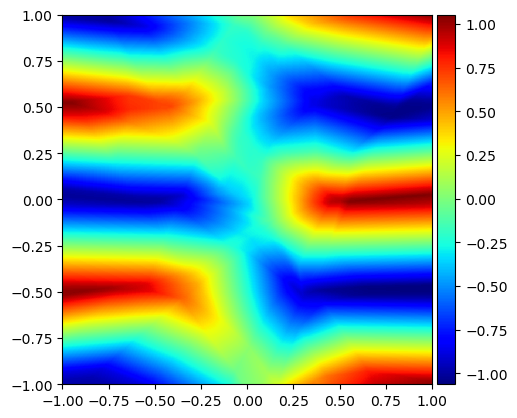

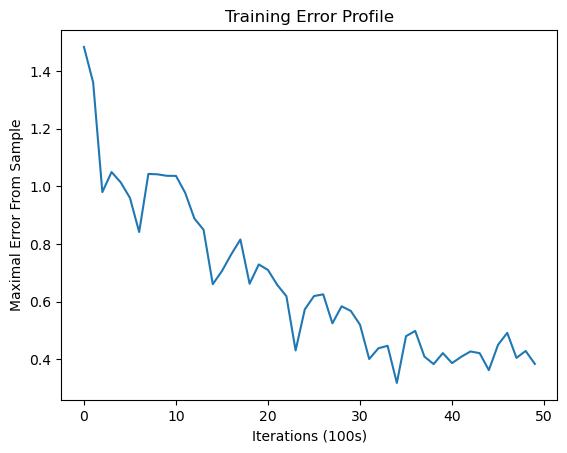

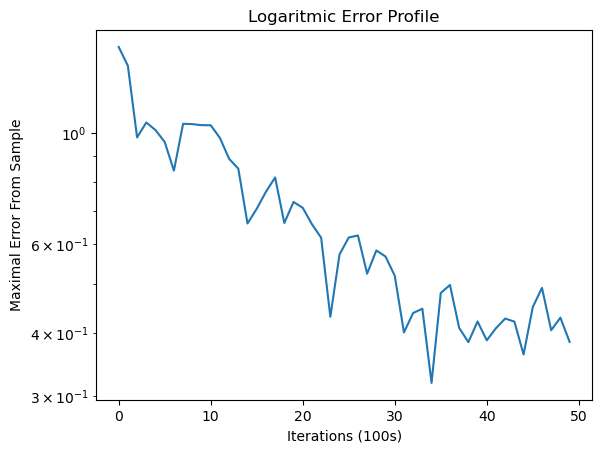

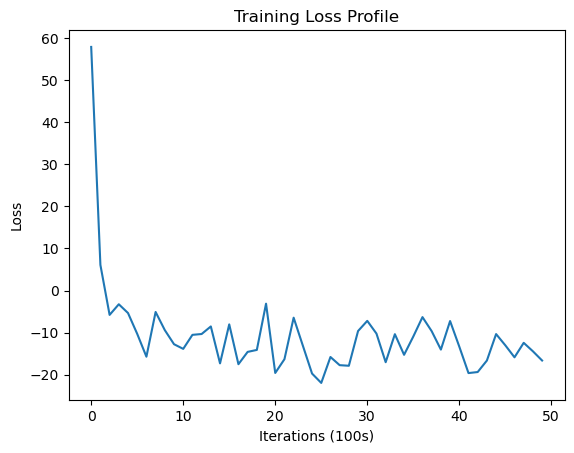

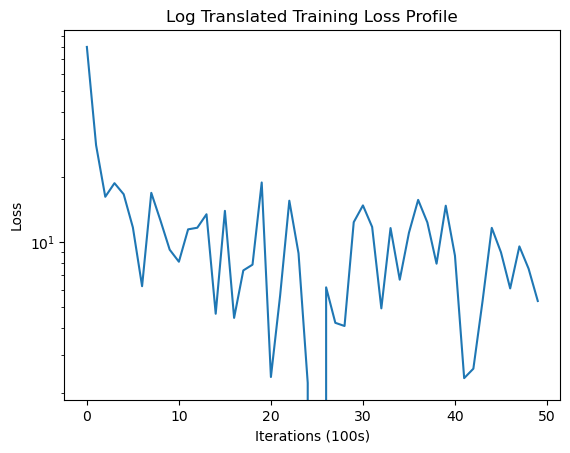

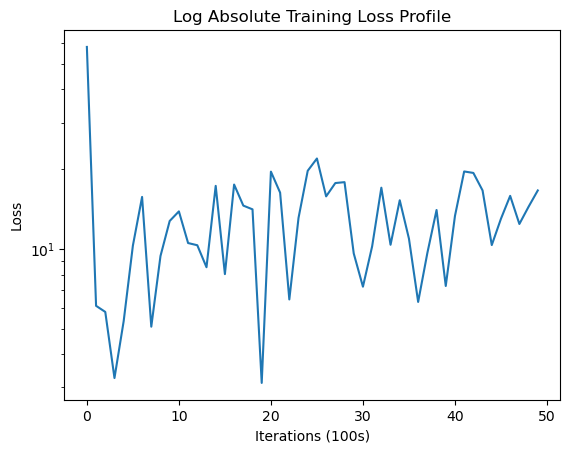

In [37]:
main('sq','drfnn')

srnn(
  (input): Linear(in_features=2, out_features=10, bias=True)
  (hidden): Linear(in_features=10, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)
epoch: 0 loss: 211.8772735595703 loss_r: 1.3873271942138672 loss_b: 210.4899444580078
error: 1.246117353439331
epoch: 100 loss: 135.50314331054688 loss_r: -2.6438653469085693 loss_b: 138.14700317382812
error: 1.2182881832122803
epoch: 200 loss: 86.89764404296875 loss_r: -3.960820198059082 loss_b: 90.85846710205078
error: 1.0652427673339844
epoch: 300 loss: 36.741661071777344 loss_r: -10.680143356323242 loss_b: 47.42180252075195
error: 1.1062771081924438
epoch: 400 loss: 15.678488731384277 loss_r: -9.920233726501465 loss_b: 25.598722457885742
error: 1.1325764656066895
epoch: 500 loss: -2.9081573486328125 loss_r: -15.679841041564941 loss_b: 12.771683692932129
error: 1.0554566383361816
epoch: 600 loss: -9.188238143920898 loss_r: -14.507610321044922 loss_b: 5.319372177124023
error: 

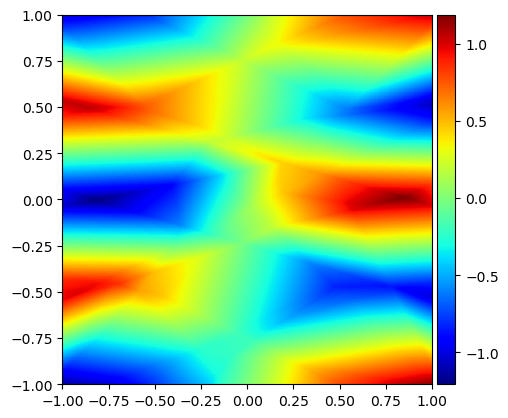

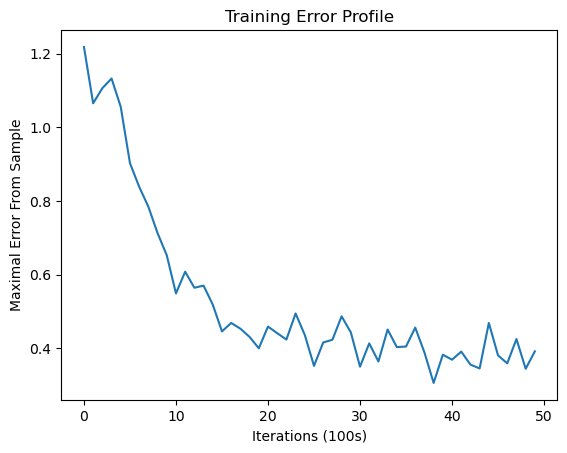

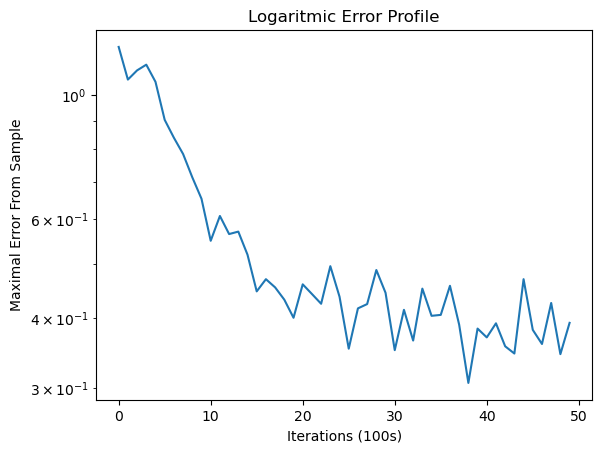

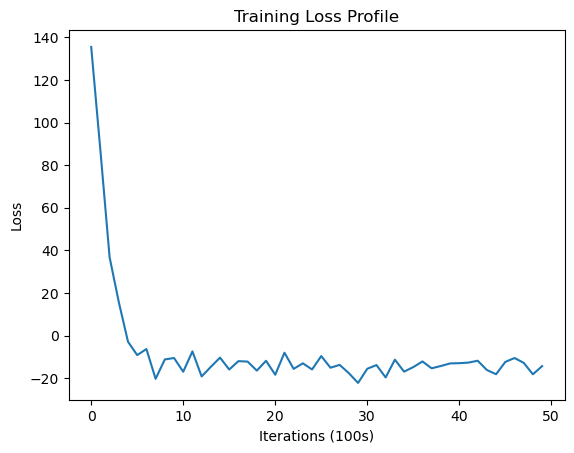

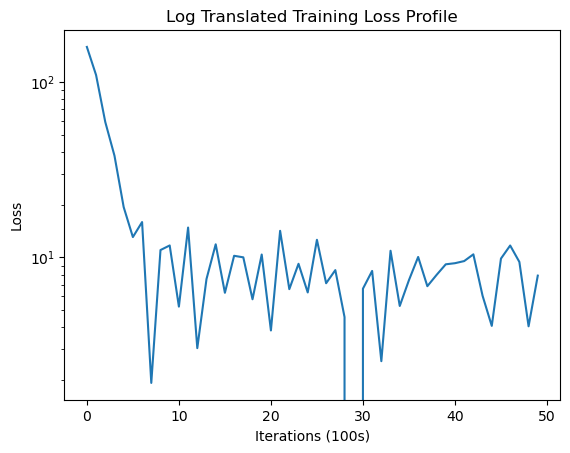

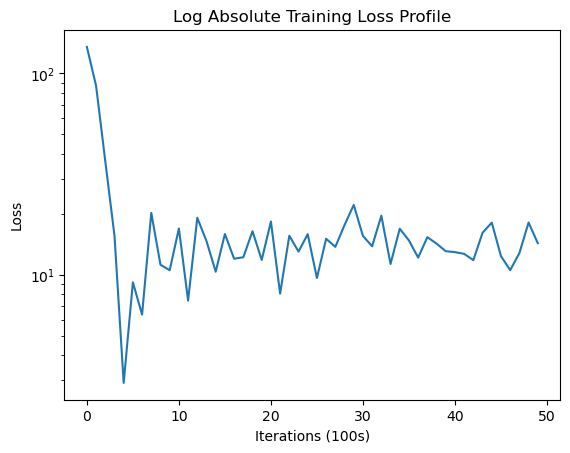

In [38]:
main('sq','srnn')

drfnn2(
  (stack): ModuleList(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): Linear(in_features=10, out_features=10, bias=True)
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): Linear(in_features=10, out_features=10, bias=True)
    (8): Linear(in_features=10, out_features=10, bias=True)
  )
  (output): Linear(in_features=10, out_features=1, bias=True)
  (phi): Tanh()
)
epoch: 0 loss: 251.23219299316406 loss_r: 1.8350417613983154 loss_b: 249.39715576171875
error: 1.1757043600082397
epoch: 100 loss: 75.56182861328125 loss_r: -8.350162506103516 loss_b: 83.9119873046875
error: 1.1079692840576172
epoch: 200 loss: -11.198846817016602 loss_r: -14.97543716430664 loss_b: 3.776589870452881
error: 0.9253017902374268
epo

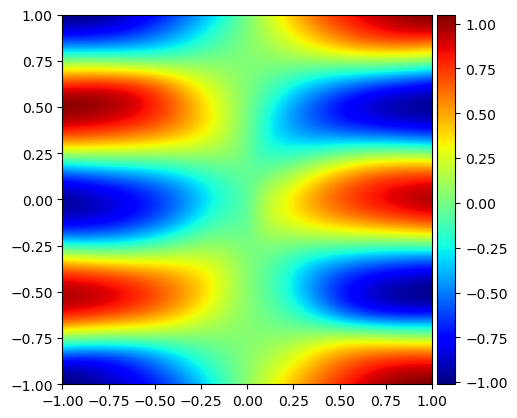

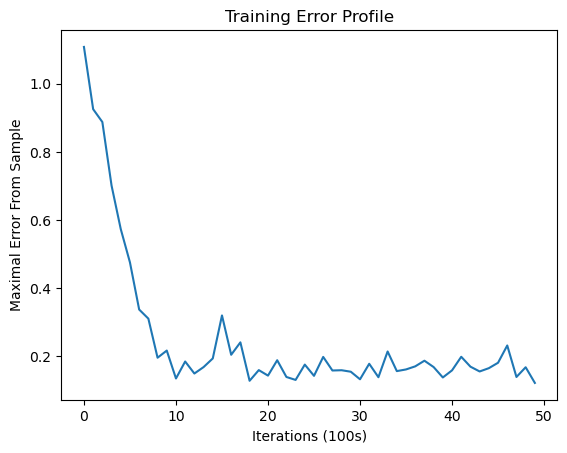

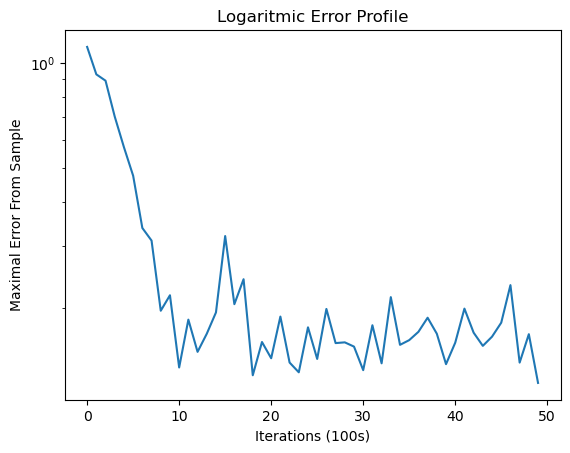

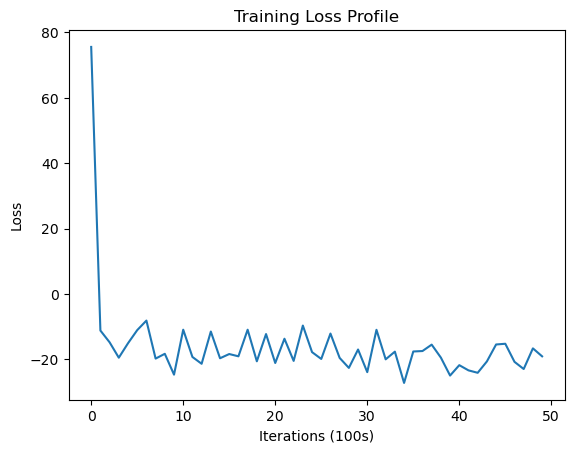

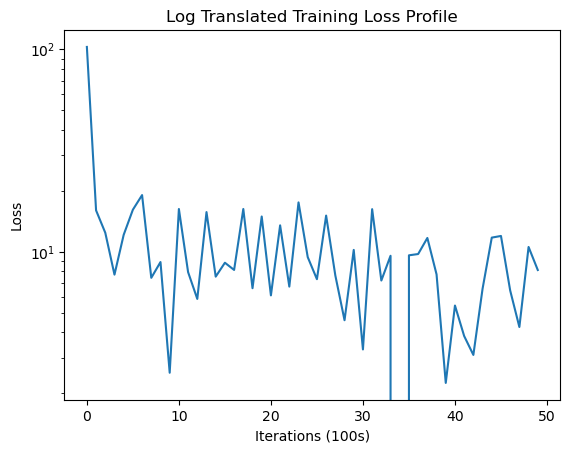

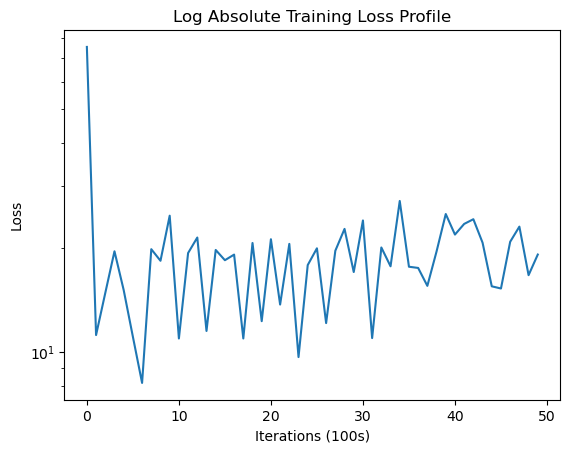

In [39]:
main('sq','drfnn2')

drrnn2(
  (input): Linear(in_features=2, out_features=10, bias=True)
  (stack): ModuleList(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): Linear(in_features=10, out_features=10, bias=True)
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): Linear(in_features=10, out_features=10, bias=True)
  )
  (output): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)
epoch: 0 loss: 6114.6435546875 loss_r: 10.989020347595215 loss_b: 6103.654296875
error: 6.3667449951171875
epoch: 100 loss: 61.7831916809082 loss_r: -4.570072650909424 loss_b: 66.35326385498047
error: 1.1119307279586792
epoch: 200 loss: 18.52529525756836 loss_r: -4.446739673614502 loss_b: 22.972034454345703
error: 1.0697466135025024
epoch: 3

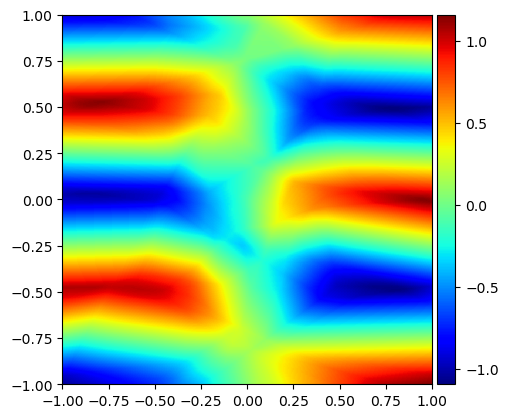

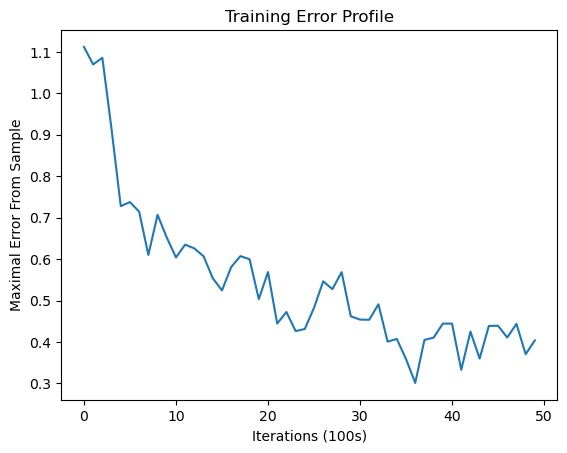

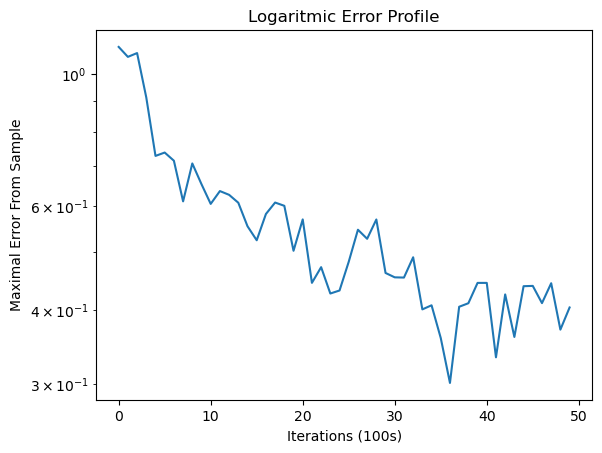

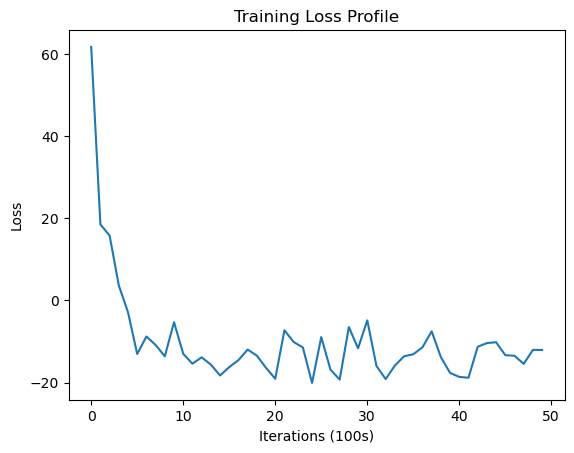

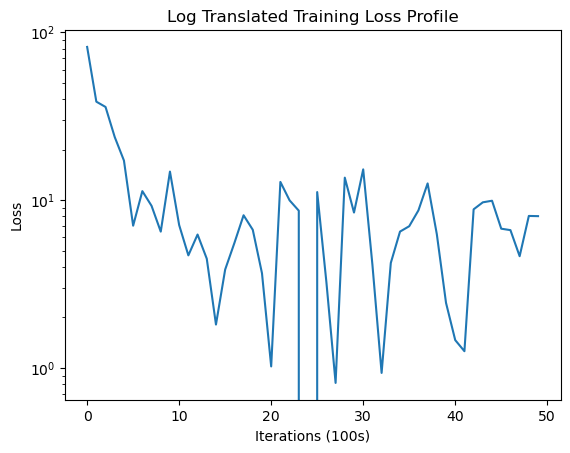

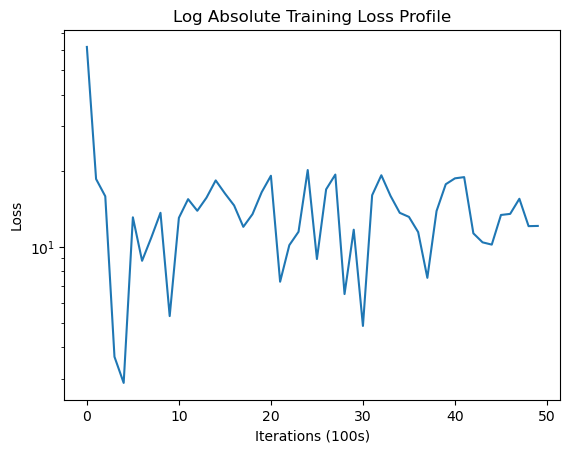

In [40]:
main('sq','drrnn2')

drrnn2t(
  (input): Linear(in_features=2, out_features=10, bias=True)
  (stack): ModuleList(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): Linear(in_features=10, out_features=10, bias=True)
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): Linear(in_features=10, out_features=10, bias=True)
  )
  (output): Linear(in_features=10, out_features=1, bias=True)
  (tanh): Tanh()
)
epoch: 0 loss: 1849.733642578125 loss_r: 41.106693267822266 loss_b: 1808.626953125
error: 3.860764980316162
epoch: 100 loss: 64.43024444580078 loss_r: -6.411644458770752 loss_b: 70.84188842773438
error: 1.420811653137207
epoch: 200 loss: -9.067577362060547 loss_r: -14.921268463134766 loss_b: 5.853691101074219
error: 0.9614279270172119
epoch

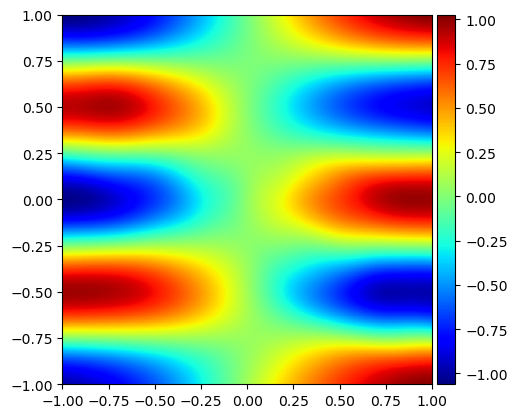

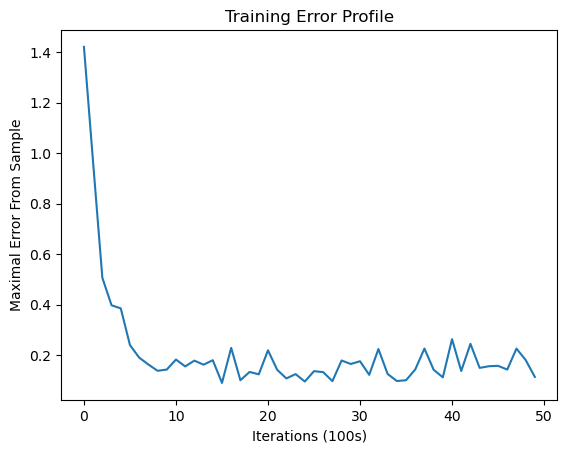

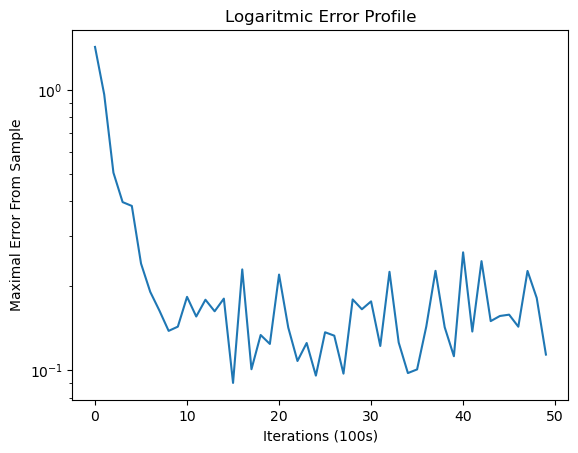

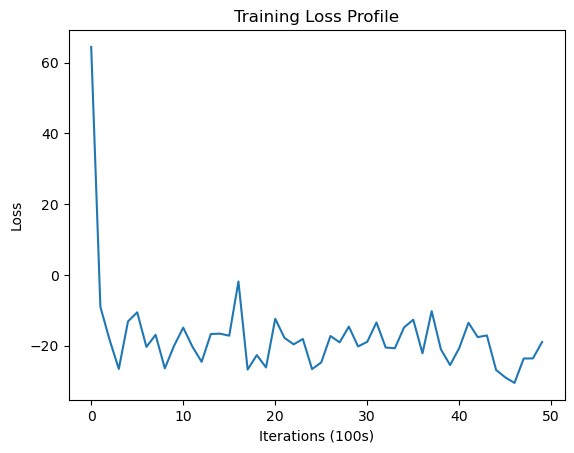

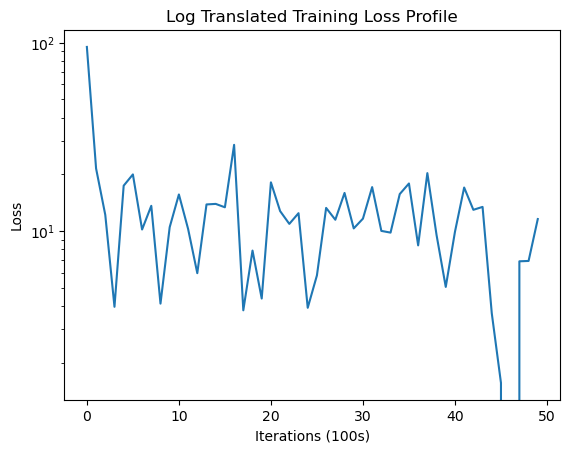

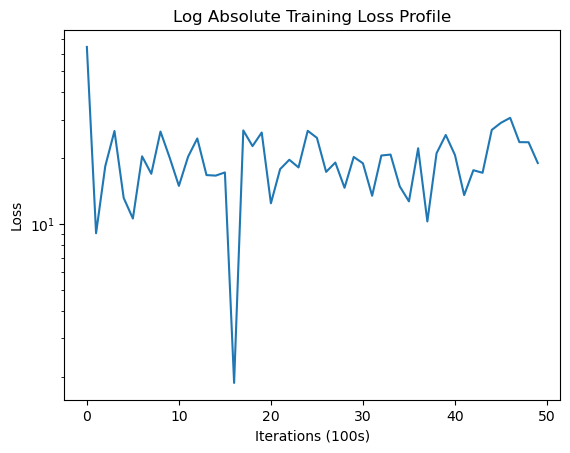

In [41]:
main('sq','drrnn2t')

drrnn3(
  (relu): ReLU()
  (stack): ModuleList(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): BlockReLU(
      (L1): Linear(in_features=10, out_features=10, bias=True)
      (L2): Linear(in_features=10, out_features=10, bias=True)
      (relu): ReLU()
    )
    (2): BlockReLU(
      (L1): Linear(in_features=10, out_features=10, bias=True)
      (L2): Linear(in_features=10, out_features=10, bias=True)
      (relu): ReLU()
    )
    (3): BlockReLU(
      (L1): Linear(in_features=10, out_features=10, bias=True)
      (L2): Linear(in_features=10, out_features=10, bias=True)
      (relu): ReLU()
    )
    (4): BlockReLU(
      (L1): Linear(in_features=10, out_features=10, bias=True)
      (L2): Linear(in_features=10, out_features=10, bias=True)
      (relu): ReLU()
    )
    (5): Linear(in_features=10, out_features=1, bias=True)
  )
)
epoch: 0 loss: 3250.620849609375 loss_r: 33.60565185546875 loss_b: 3217.01513671875
error: 5.1444196701049805
epoch: 100 loss: 102.20803

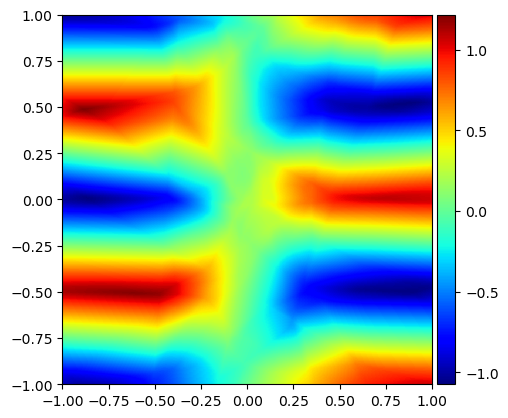

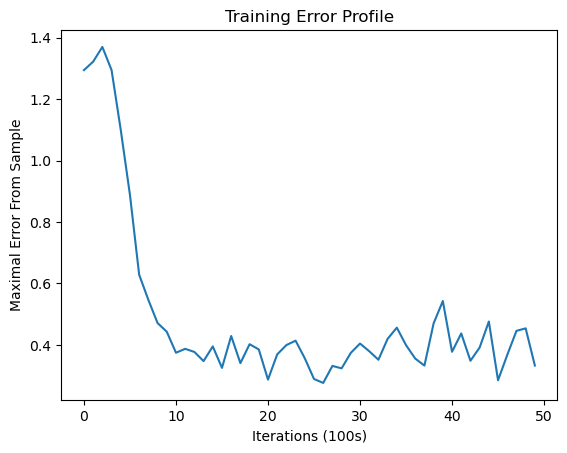

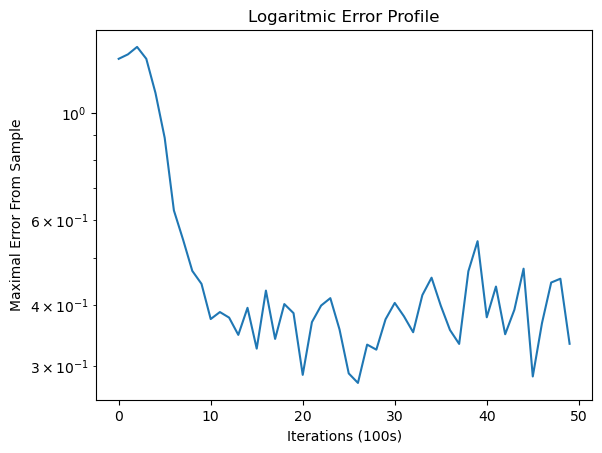

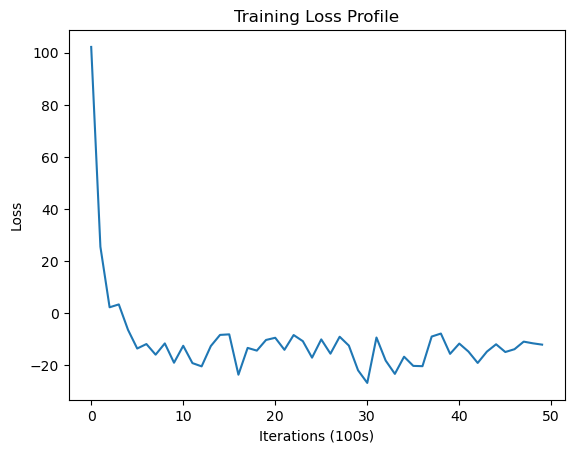

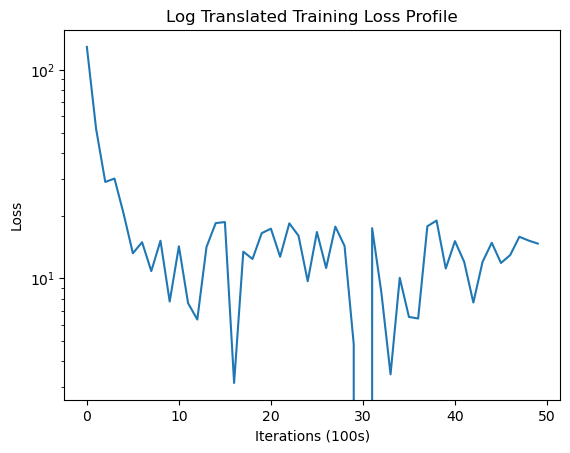

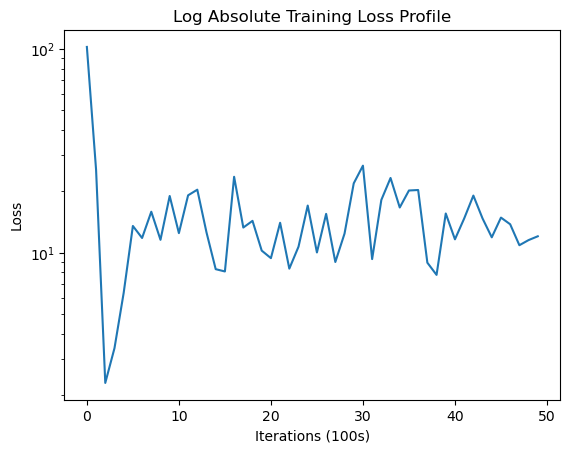

In [42]:
main('sq','drrnn3')

drrnn4(
  (stack): ModuleList(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): BlockPower(
      (L1): Linear(in_features=10, out_features=10, bias=True)
      (L2): Linear(in_features=10, out_features=10, bias=True)
      (phi): PowerReLU()
    )
    (2): BlockPower(
      (L1): Linear(in_features=10, out_features=10, bias=True)
      (L2): Linear(in_features=10, out_features=10, bias=True)
      (phi): PowerReLU()
    )
    (3): BlockPower(
      (L1): Linear(in_features=10, out_features=10, bias=True)
      (L2): Linear(in_features=10, out_features=10, bias=True)
      (phi): PowerReLU()
    )
    (4): BlockPower(
      (L1): Linear(in_features=10, out_features=10, bias=True)
      (L2): Linear(in_features=10, out_features=10, bias=True)
      (phi): PowerReLU()
    )
    (5): Linear(in_features=10, out_features=1, bias=True)
  )
)
epoch: 0 loss: 405.8135986328125 loss_r: -2.834153652191162 loss_b: 408.64776611328125
error: 1.4256668090820312
epoch: 100 loss: 62.

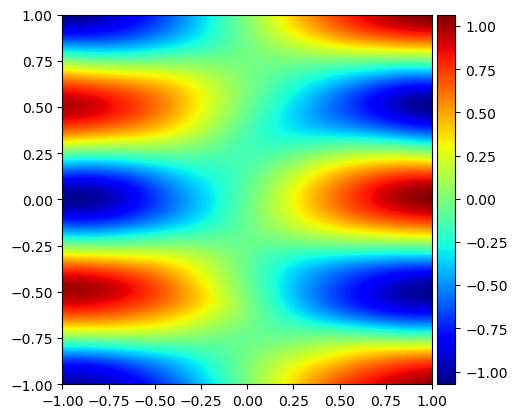

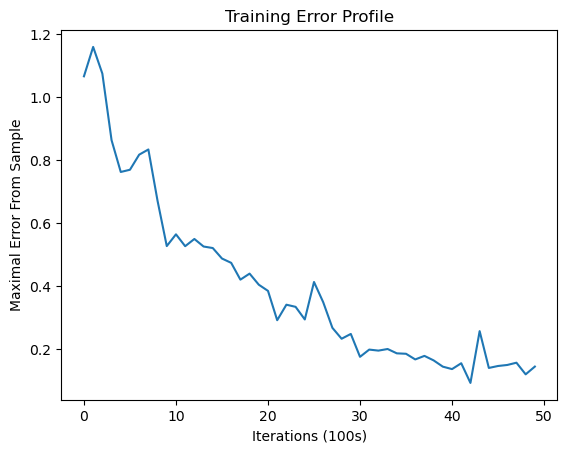

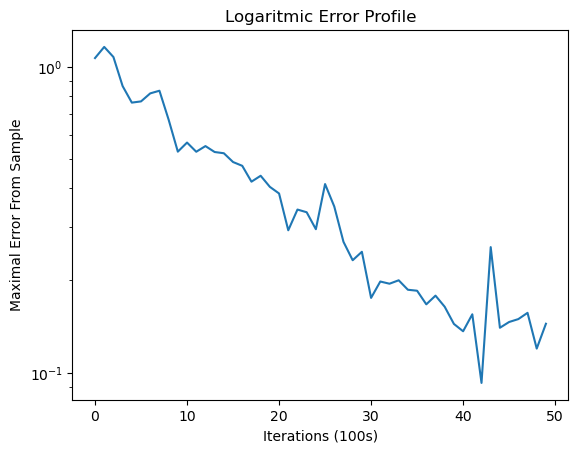

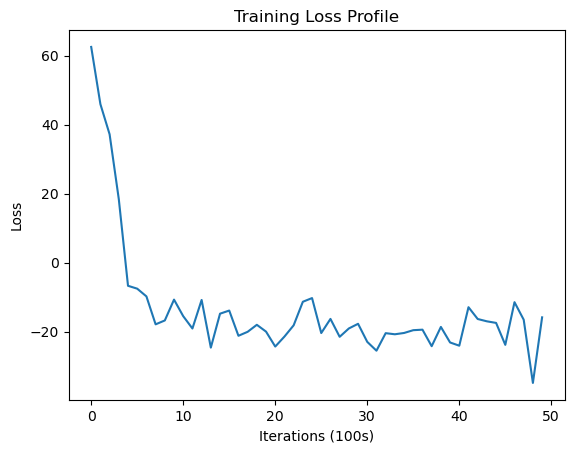

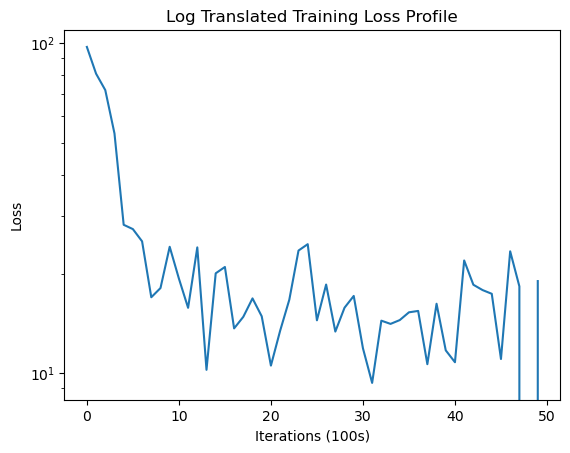

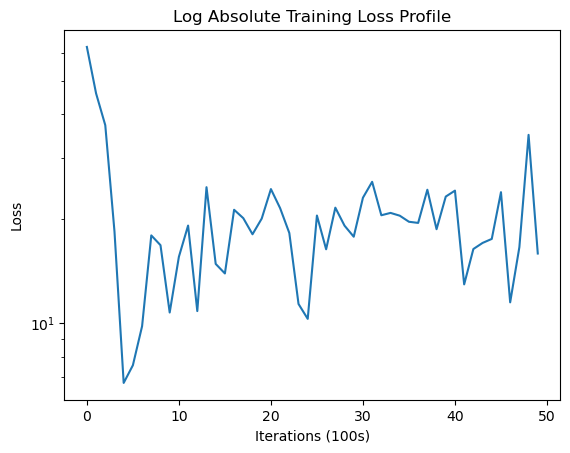

In [43]:
main('sq','drrnn4')

drrnn(
  (phi): Tanh()
  (stack): ModuleList(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Block(
      (L1): Linear(in_features=10, out_features=10, bias=True)
      (L2): Linear(in_features=10, out_features=10, bias=True)
      (phi): Tanh()
    )
    (2): Block(
      (L1): Linear(in_features=10, out_features=10, bias=True)
      (L2): Linear(in_features=10, out_features=10, bias=True)
      (phi): Tanh()
    )
    (3): Block(
      (L1): Linear(in_features=10, out_features=10, bias=True)
      (L2): Linear(in_features=10, out_features=10, bias=True)
      (phi): Tanh()
    )
    (4): Block(
      (L1): Linear(in_features=10, out_features=10, bias=True)
      (L2): Linear(in_features=10, out_features=10, bias=True)
      (phi): Tanh()
    )
    (5): Linear(in_features=10, out_features=1, bias=True)
  )
)
epoch: 0 loss: 169.95542907714844 loss_r: 1.6878411769866943 loss_b: 168.26759338378906
error: 1.2094906568527222
epoch: 100 loss: 91.50752258300781 loss_r: 6

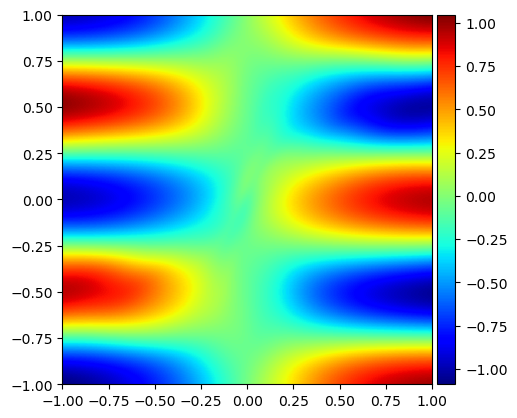

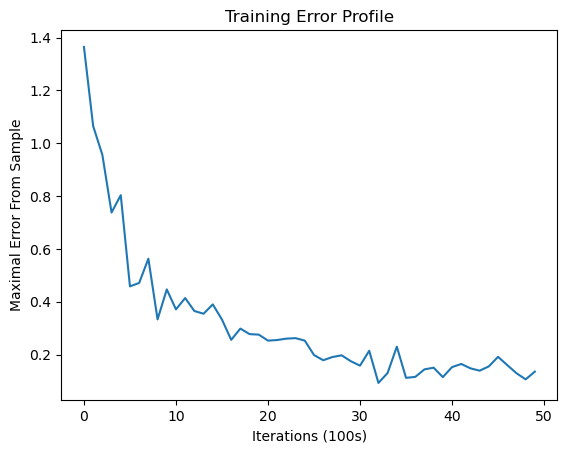

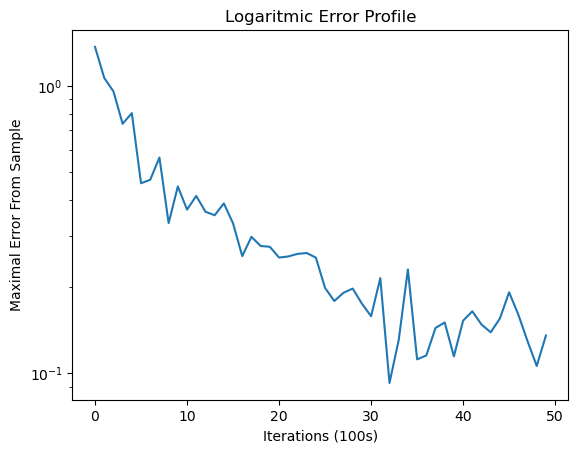

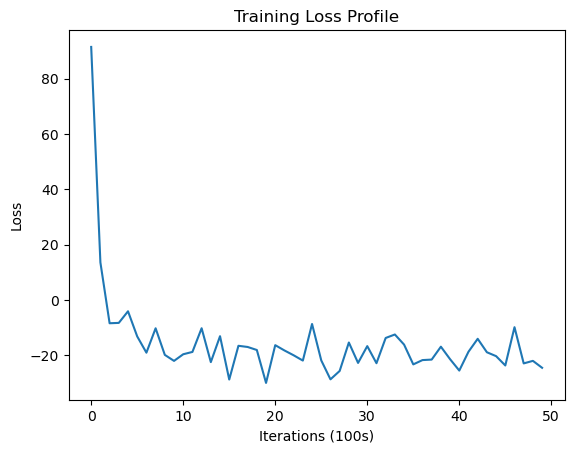

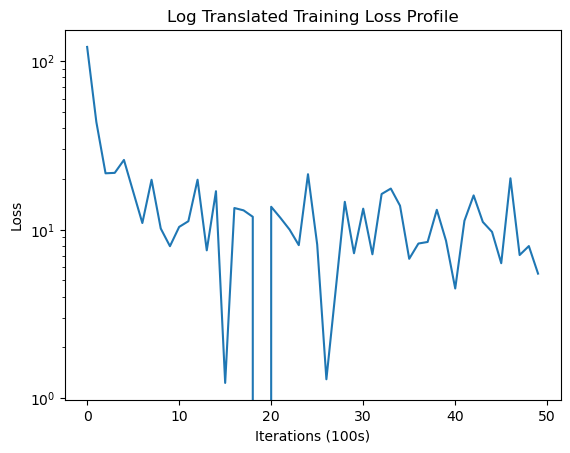

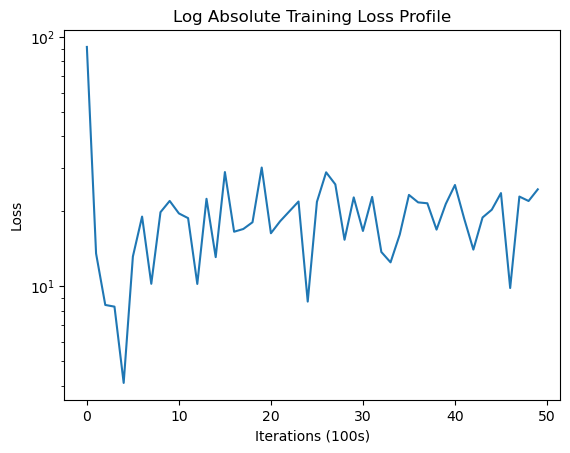

In [44]:
main('sq','')

srnn(
  (input): Linear(in_features=2, out_features=10, bias=True)
  (hidden): Linear(in_features=10, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)
epoch: 0 loss: 227.6604461669922 loss_r: 0.5838426351547241 loss_b: 227.07659912109375
error: 1.2536201477050781
epoch: 100 loss: 146.8315887451172 loss_r: -1.0554473400115967 loss_b: 147.8870391845703
error: 1.2799930572509766
epoch: 200 loss: 93.71794128417969 loss_r: 0.7379740476608276 loss_b: 92.97996520996094
error: 1.247969627380371
epoch: 300 loss: 83.88833618164062 loss_r: -0.9758577942848206 loss_b: 84.86419677734375
error: 1.2625529766082764
epoch: 400 loss: 88.4742431640625 loss_r: 1.3277487754821777 loss_b: 87.14649200439453
error: 1.3367763757705688
epoch: 500 loss: 48.69099426269531 loss_r: -0.6062066555023193 loss_b: 49.29719924926758
error: 1.2966594696044922
epoch: 600 loss: 43.53706741333008 loss_r: -7.15742826461792 loss_b: 50.694496154785156
error: 1.16801440

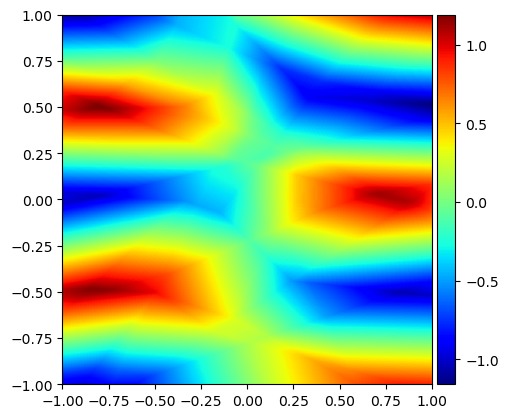

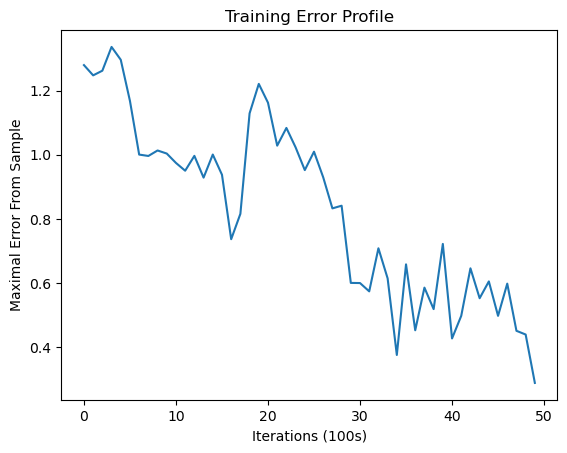

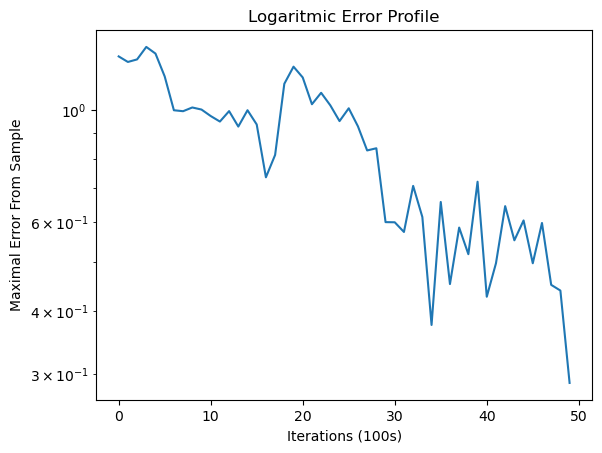

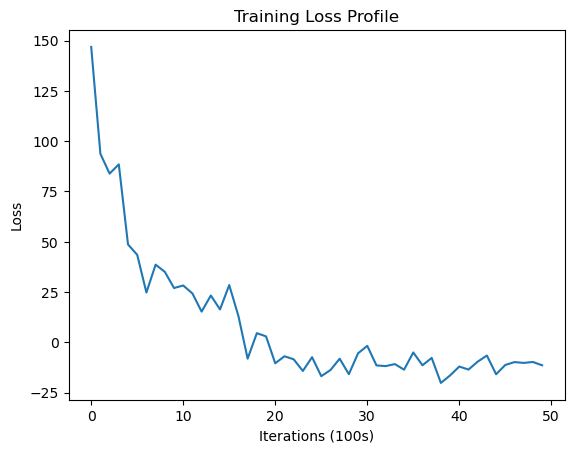

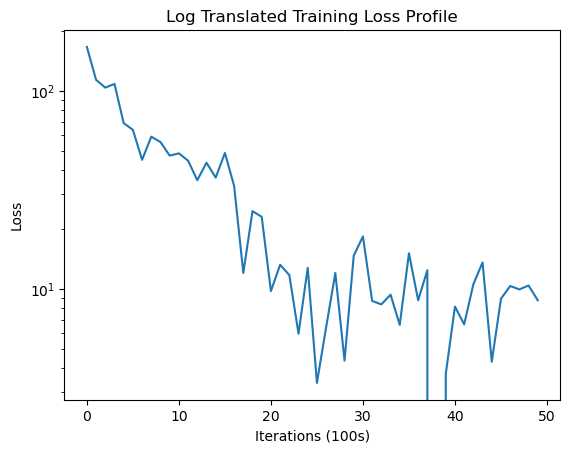

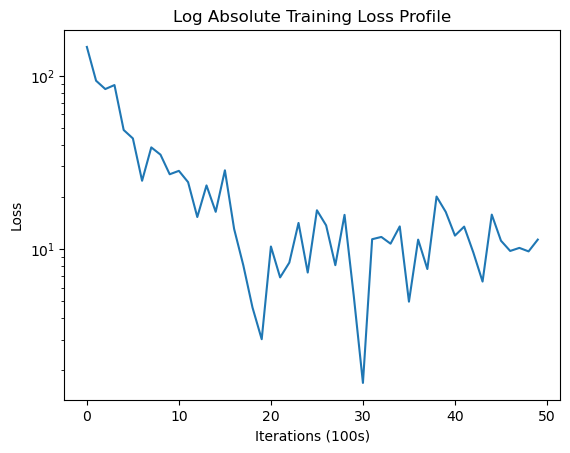

In [45]:
main('sq','srnn',m=100)

drrnn(
  (phi): Tanh()
  (stack): ModuleList(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Block(
      (L1): Linear(in_features=10, out_features=10, bias=True)
      (L2): Linear(in_features=10, out_features=10, bias=True)
      (phi): Tanh()
    )
    (2): Block(
      (L1): Linear(in_features=10, out_features=10, bias=True)
      (L2): Linear(in_features=10, out_features=10, bias=True)
      (phi): Tanh()
    )
    (3): Block(
      (L1): Linear(in_features=10, out_features=10, bias=True)
      (L2): Linear(in_features=10, out_features=10, bias=True)
      (phi): Tanh()
    )
    (4): Block(
      (L1): Linear(in_features=10, out_features=10, bias=True)
      (L2): Linear(in_features=10, out_features=10, bias=True)
      (phi): Tanh()
    )
    (5): Linear(in_features=10, out_features=1, bias=True)
  )
)
epoch: 0 loss: 227.8496551513672 loss_r: 0.627800703048706 loss_b: 227.2218475341797
error: 1.7300848960876465
epoch: 100 loss: 96.4161605834961 loss_r: 0.005

epoch: 6200 loss: -17.646547317504883 loss_r: -17.951335906982422 loss_b: 0.30478930473327637
error: 0.1137838065624237
epoch: 6300 loss: -24.460237503051758 loss_r: -24.754962921142578 loss_b: 0.29472601413726807
error: 0.07759980857372284
epoch: 6400 loss: -16.48482322692871 loss_r: -16.805517196655273 loss_b: 0.3206934928894043
error: 0.11364954710006714
epoch: 6500 loss: -16.55849838256836 loss_r: -17.172569274902344 loss_b: 0.6140701770782471
error: 0.1522185206413269
epoch: 6600 loss: -29.918554306030273 loss_r: -30.793230056762695 loss_b: 0.8746755123138428
error: 0.17360928654670715
epoch: 6700 loss: -20.104381561279297 loss_r: -20.646039962768555 loss_b: 0.5416581630706787
error: 0.11952781677246094
epoch: 6800 loss: -26.106048583984375 loss_r: -27.356691360473633 loss_b: 1.250641942024231
error: 0.11027680337429047
epoch: 6900 loss: -24.614295959472656 loss_r: -24.96010398864746 loss_b: 0.3458085358142853
error: 0.08602000772953033
epoch: 7000 loss: -20.532100677490234 loss_r

epoch: 13100 loss: -18.47389793395996 loss_r: -18.970775604248047 loss_b: 0.4968772530555725
error: 0.13675792515277863
epoch: 13200 loss: -23.514394760131836 loss_r: -23.807748794555664 loss_b: 0.2933545410633087
error: 0.09313836693763733
epoch: 13300 loss: -22.197362899780273 loss_r: -22.607858657836914 loss_b: 0.4104953706264496
error: 0.10933992266654968
epoch: 13400 loss: -24.78085708618164 loss_r: -25.2911319732666 loss_b: 0.5102758407592773
error: 0.09309619665145874
epoch: 13500 loss: -29.02918243408203 loss_r: -29.286392211914062 loss_b: 0.25720974802970886
error: 0.0646759644150734
epoch: 13600 loss: -11.481658935546875 loss_r: -12.1083345413208 loss_b: 0.6266753077507019
error: 0.10895466804504395
epoch: 13700 loss: -19.130048751831055 loss_r: -19.430152893066406 loss_b: 0.30010324716567993
error: 0.10244044661521912
epoch: 13800 loss: -22.89493179321289 loss_r: -23.656524658203125 loss_b: 0.7615926861763
error: 0.11832023411989212
epoch: 13900 loss: -24.471872329711914 los

epoch: 20000 loss: -19.522369384765625 loss_r: -19.987686157226562 loss_b: 0.4653170108795166
error: 0.08754569292068481
best epoch: 19700 best loss: tensor(-32.5730, grad_fn=<AddBackward0>)
load from ckpt!


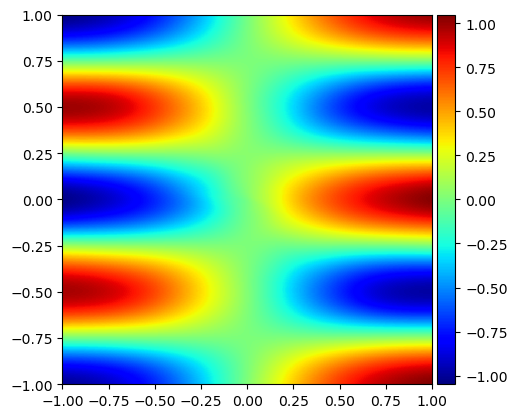

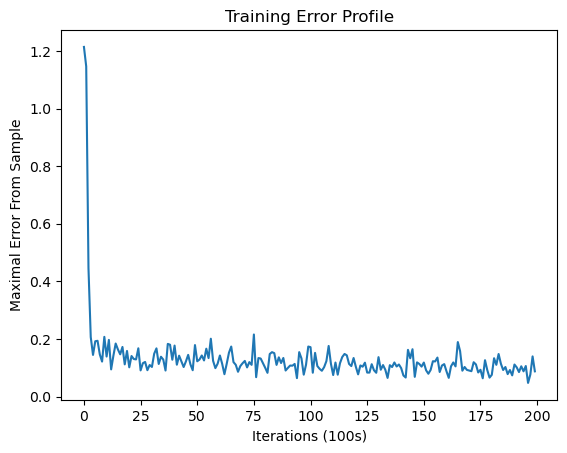

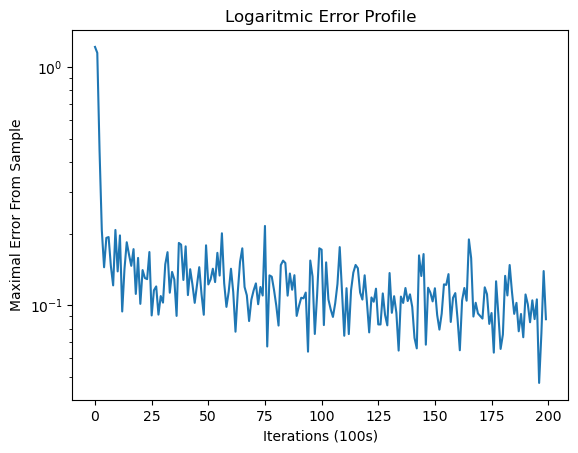

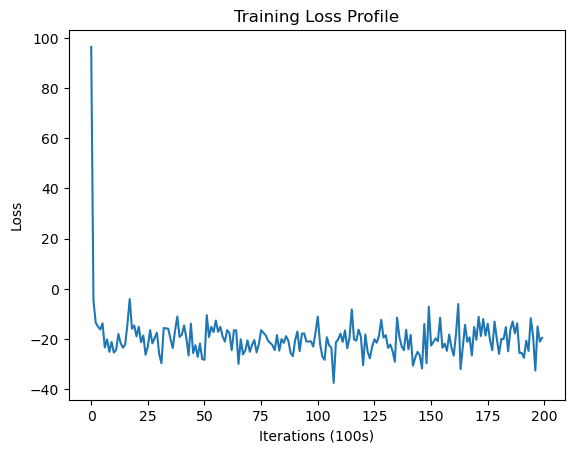

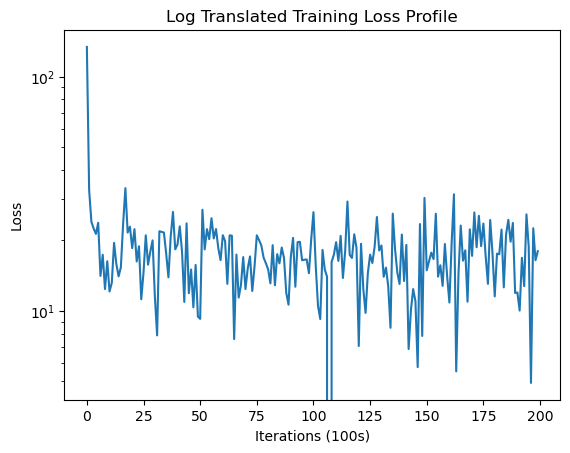

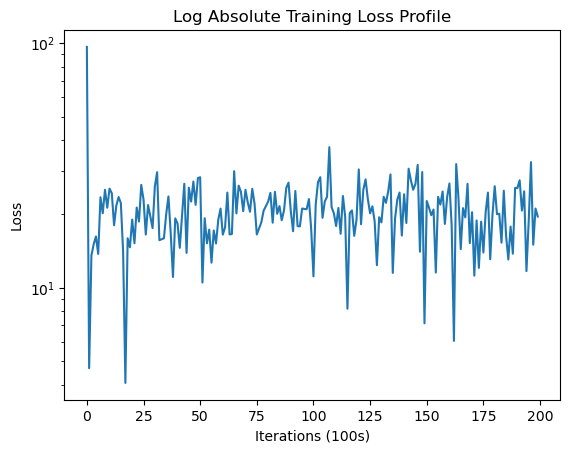

In [46]:
main('sq','', 20000)

# Plotting

load from ckpt!


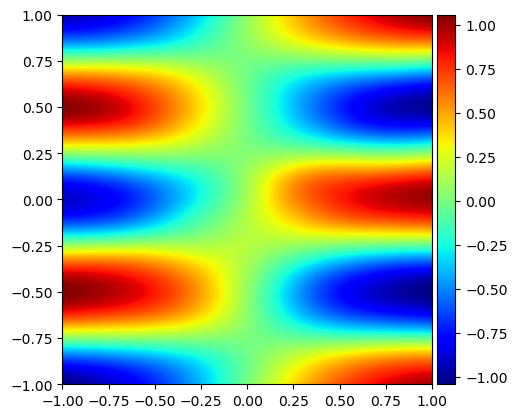

In [36]:
# LOAD TRAINED MODEL
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import torch

in_N = 2      # Input Dimensions
m = 10        # width of hidden layer
out_N = 1     # Output Dimensions

device = torch.device('cpu')
model = drrnn2t(in_N, m, out_N).to(device)
    
# PLOT SETUP
model.load_state_dict(torch.load('new_best_deep_ritz1.mdl'))
print('load from ckpt!')
num_points=1001
x1 = torch.linspace(-1, 1, 1001)
x2 = torch.linspace(-1, 1, 1001)
X, Y = torch.meshgrid(x1, x2)

# CHOOSE DOMAIN
# Square
mask = (np.abs(X) >= 0)
# Circle
#mask = (np.sqrt(X**2 + Y**2) <= 1)
# L-shape
mask1 = (X <= 0) #or (Y <= 0)
mask2 = (Y >= 0)
#mask = mask1 + mask2

# EVALUATE MODEL IN [-1,1]^2
Z = torch.cat((Y.flatten()[:, None], Y.T.flatten()[:, None]), dim=1)
Z = Z.to(device)
with torch.no_grad():
    pred = model(Z)


# CROP/MASK TO DOMAIN USING NaN
pred_full = np.empty((num_points, num_points))
pred_full.fill(np.nan)
np.putmask(pred_full, mask, pred.cpu().numpy())

# PLOT
plt.figure()
ax = plt.subplot(1, 1, 1)
h = plt.imshow(pred_full, interpolation='nearest', cmap='jet',
               extent=[-1, 1, -1, 1],
               origin='lower', aspect='equal',
               vmin=np.nanmin(pred_full), vmax=np.nanmax(pred_full))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(h, cax=cax)
plt.show()

--------------------------------------------------------------------------------------------------------------------------------

# Results

Approximations made by each model after training for 5000 epochs.

### Shallow Neural Network
Architecture: One hidden layer, width 10. ReLU Activation.

![alt text](example1_srnn5000.png "Title")
![alt text](example1_srnn5000_error.png "Title")
![alt text](example1_srnn5000_loss.png "Title")


### Feedforward Neural Network
Architecture: 8 hidden layers, width 10. ReLU Activation.

![alt text](example1_drfnn5000.png "Title")
![alt text](example1_drfnn5000_error.png "Title")
![alt text](example1_drfnn5000_loss.png "Title")


### (Simple) Residual Neural Network
Architecture: 8 hidden layers, width 10, each with skip connection. ReLU Activation.

![alt text](example1_drrnn25000.png "Title")
![alt text](example1_drrnn25000_error.png "Title")
![alt text](example1_drrnn25000_loss.png "Title")

### (Original) Residual Neural Network
Architecture: 4 blocks with skip connection, each made up of 2 layers, width 10. Tanh Activation.

![alt text](example1_drrnn5000.png "Title")
![alt text](example1_drrnn5000_error.png "Title")
![alt text](example1_drrnn5000_loss.png "Title")

### (Original) Residual Neural Network, ReLU Activation
Architecture: 4 blocks with skip connection, each made up of 2 layers, width 10. ReLU Activation.

![alt text](example1_drrnn35000.png "Title")
![alt text](example1_drrnn35000_error.png "Title")
![alt text](example1_drrnn35000_loss.png "Title")

### (Original) Residual Neural Network, ReLU3 Activation
Architecture: 4 blocks with skip connection, each made up of 2 layers, width 10. ReLU3 Activation.

![alt text](example1_drrnn45000.png "Title")
![alt text](example1_drrnn45000_error.png "Title")
![alt text](example1_drrnn45000_loss.png "Title")

--------------------------------------------------------------------------------------------------------------------------------